In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [4]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('spam.csv', encoding='latin1')

In [5]:
# Mostrar las primeras filas wdel DataFrame
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [6]:
# Obtener información sobre el DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [7]:
# Contar la cantidad de mensajes SPAM y HAM
print(df['v1'].value_counts())

v1
ham     4825
spam     747
Name: count, dtype: int64


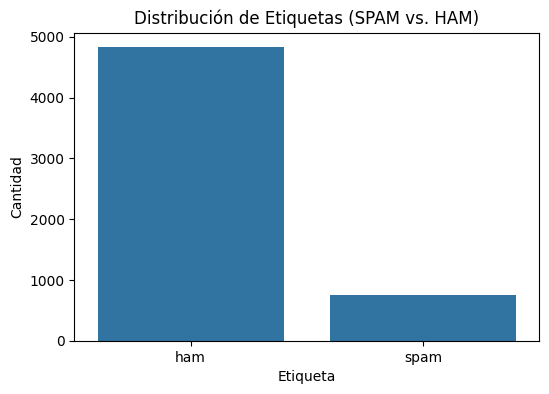

In [8]:
# Visualizar la distribución de las etiquetas (SPAM vs. HAM)
plt.figure(figsize=(6, 4))
sns.countplot(x='v1', data=df)
plt.title('Distribución de Etiquetas (SPAM vs. HAM)')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad')
plt.show()

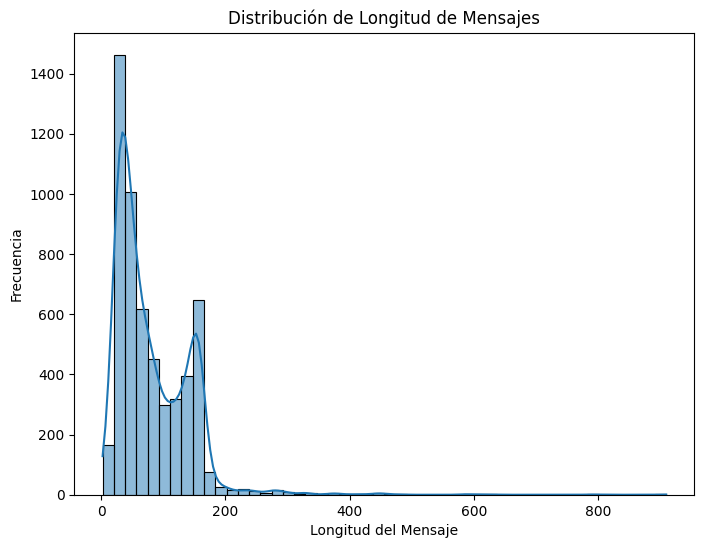

In [9]:
# Calcular la longitud de los mensajes y visualizar su distribución
df['message_length'] = df['v2'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df['message_length'], bins=50, kde=True)
plt.title('Distribución de Longitud de Mensajes')
plt.xlabel('Longitud del Mensaje')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\estra\AppData\Local\Temp\ipykernel_26288\2762550980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='v1', data=df, palette='Set2')


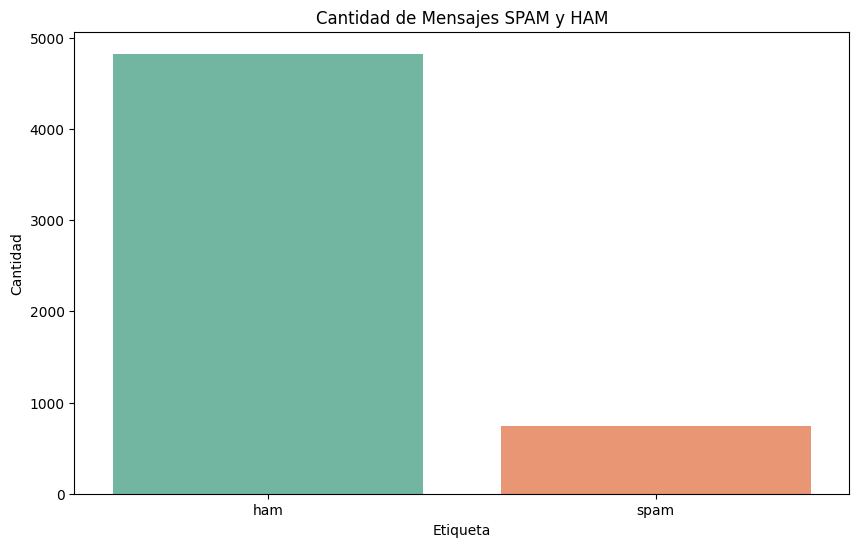

In [10]:
# Visualizar las palabras más comunes en los mensajes SPAM y HAM
spam_messages = ' '.join(df[df['v1'] == 'spam']['v2'])
ham_messages = ' '.join(df[df['v1'] == 'ham']['v2'])

plt.figure(figsize=(10, 6))
sns.countplot(x='v1', data=df, palette='Set2')
plt.title('Cantidad de Mensajes SPAM y HAM')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad')
plt.show()


In [11]:
# 1. Análisis de la longitud de las palabras
df['avg_word_length'] = df['v2'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))


In [12]:
# 2. Análisis de la distribución de palabras
def count_words(text):
    return Counter(re.findall(r'\b\w+\b', text.lower()))

spam_word_counts = count_words(' '.join(df[df['v1'] == 'spam']['v2']))
ham_word_counts = count_words(' '.join(df[df['v1'] == 'ham']['v2']))

C:\Users\estra\AppData\Local\Temp\ipykernel_26288\4224438358.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in spam_word_counts.most_common(10)], y=[word[1] for word in spam_word_counts.most_common(10)], palette='viridis')


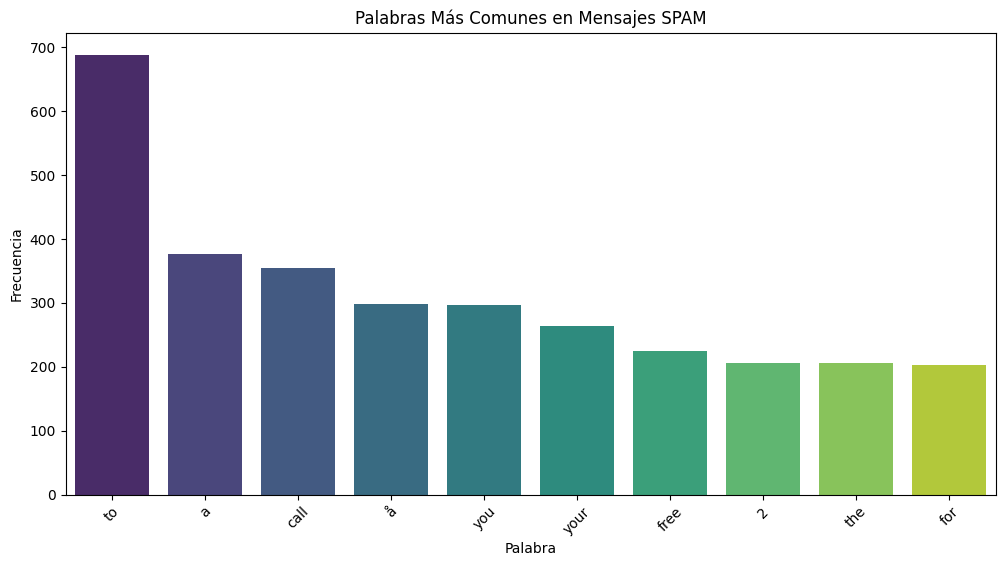

C:\Users\estra\AppData\Local\Temp\ipykernel_26288\4224438358.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in ham_word_counts.most_common(10)], y=[word[1] for word in ham_word_counts.most_common(10)], palette='viridis')


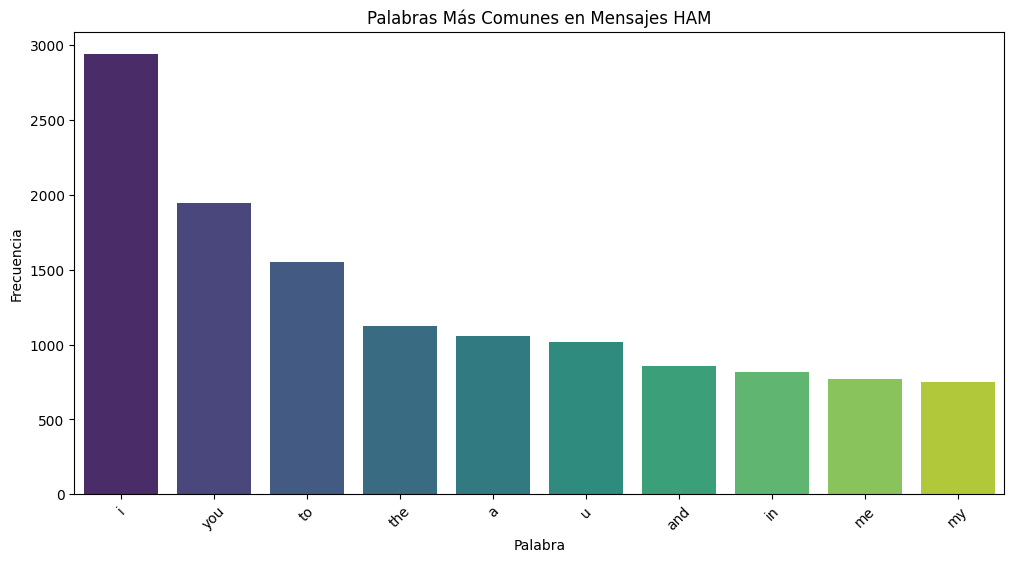

In [13]:
# Visualizar las 10 palabras más comunes en los mensajes SPAM y HAM
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in spam_word_counts.most_common(10)], y=[word[1] for word in spam_word_counts.most_common(10)], palette='viridis')
plt.title('Palabras Más Comunes en Mensajes SPAM')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in ham_word_counts.most_common(10)], y=[word[1] for word in ham_word_counts.most_common(10)], palette='viridis')
plt.title('Palabras Más Comunes en Mensajes HAM')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [14]:
# 3. Análisis de la frecuencia de palabras clave
spam_keywords = ['free', 'win', 'prize', 'urgent', 'claim']
ham_keywords = ['meeting', 'tomorrow', 'report', 'project']

spam_keyword_counts = {keyword: sum(1 for message in df[df['v1'] == 'spam']['v2'] if keyword in message.lower()) for keyword in spam_keywords}
ham_keyword_counts = {keyword: sum(1 for message in df[df['v1'] == 'ham']['v2'] if keyword in message.lower()) for keyword in ham_keywords}


C:\Users\estra\AppData\Local\Temp\ipykernel_26288\455122831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(spam_keyword_counts.keys()), y=list(spam_keyword_counts.values()), palette='Set2')


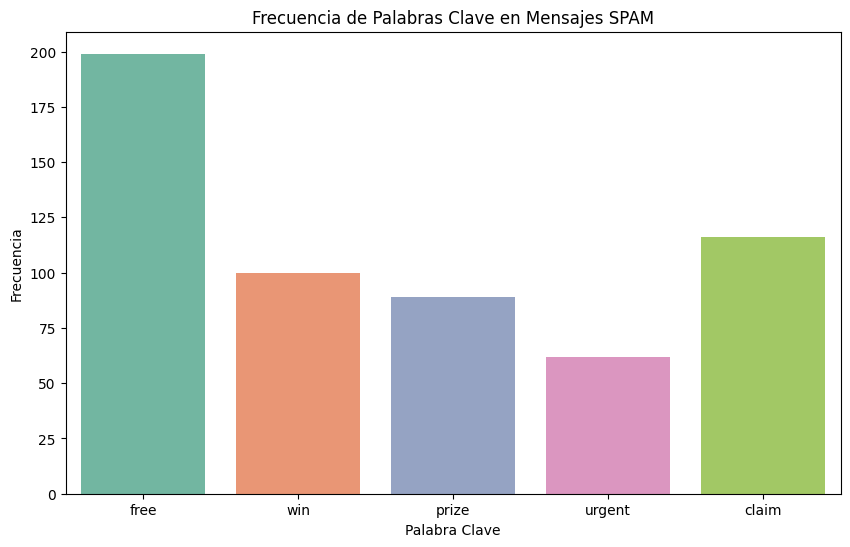

C:\Users\estra\AppData\Local\Temp\ipykernel_26288\455122831.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ham_keyword_counts.keys()), y=list(ham_keyword_counts.values()), palette='Set2')


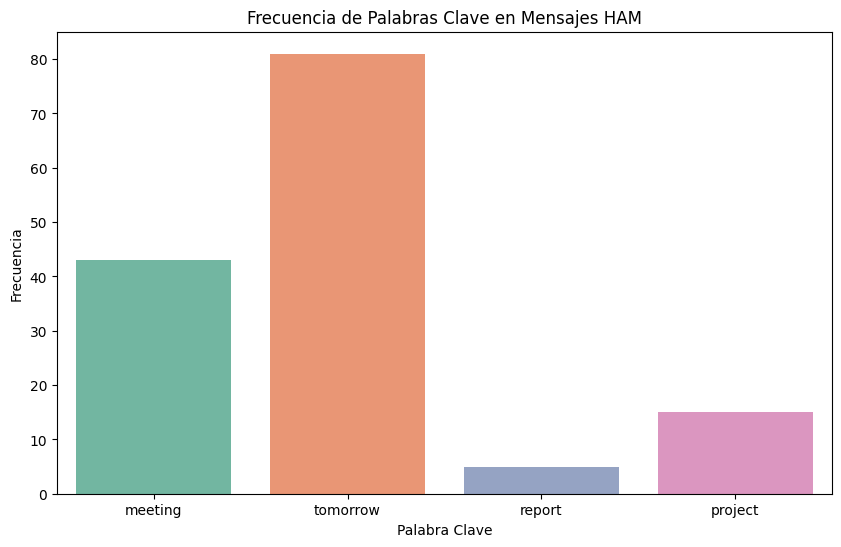

In [15]:
# Visualizar la frecuencia de palabras clave en mensajes SPAM
plt.figure(figsize=(10, 6))
sns.barplot(x=list(spam_keyword_counts.keys()), y=list(spam_keyword_counts.values()), palette='Set2')
plt.title('Frecuencia de Palabras Clave en Mensajes SPAM')
plt.xlabel('Palabra Clave')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la frecuencia de palabras clave en mensajes HAM
plt.figure(figsize=(10, 6))
sns.barplot(x=list(ham_keyword_counts.keys()), y=list(ham_keyword_counts.values()), palette='Set2')
plt.title('Frecuencia de Palabras Clave en Mensajes HAM')
plt.xlabel('Palabra Clave')
plt.ylabel('Frecuencia')
plt.show()


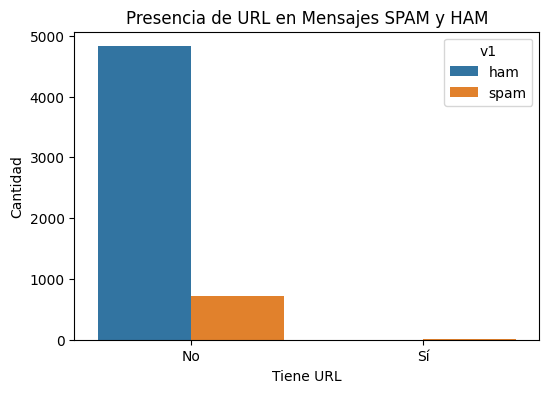

In [16]:
# 4. Análisis de la estructura del texto (presencia de enlaces URL)
df['has_url'] = df['v2'].apply(lambda x: 1 if 'http://' in x.lower() or 'https://' in x.lower() else 0)
plt.figure(figsize=(6, 4))
sns.countplot(x='has_url', hue='v1', data=df)
plt.title('Presencia de URL en Mensajes SPAM y HAM')
plt.xlabel('Tiene URL')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

C:\Users\estra\AppData\Local\Temp\ipykernel_26288\3187231007.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[char[0] for char in spam_special_character_counts.most_common()], y=[char[1] for char in spam_special_character_counts.most_common()], palette='magma')
C:\Users\estra\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


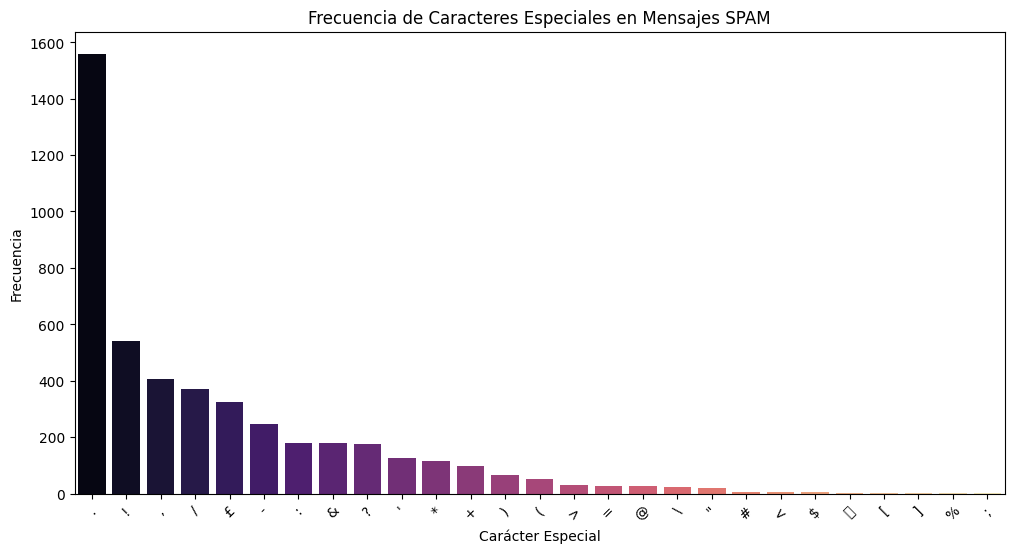

C:\Users\estra\AppData\Local\Temp\ipykernel_26288\3187231007.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[char[0] for char in ham_special_character_counts.most_common()], y=[char[1] for char in ham_special_character_counts.most_common()], palette='magma')
C:\Users\estra\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\estra\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\estra\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


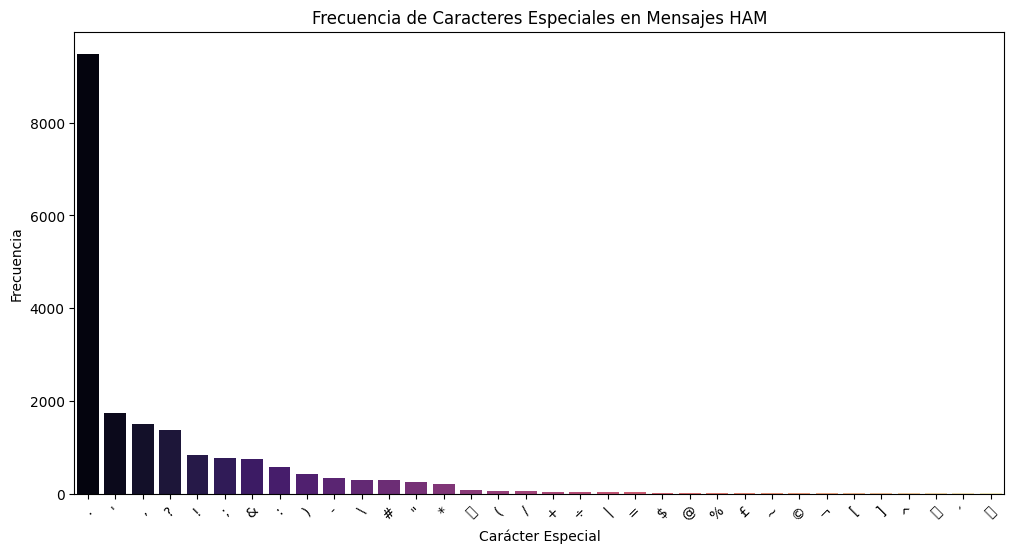

In [17]:
# 7. Análisis de la frecuencia de caracteres especiales

# Función para contar caracteres especiales
def count_special_characters(text):
    return Counter(re.findall(r'[^\w\s]', text))

# Agregar conteo de caracteres especiales al DataFrame
df['special_character_counts'] = df['v2'].apply(count_special_characters)

# Separar los conteos de caracteres especiales por tipo de mensaje (SPAM y HAM)
spam_special_character_counts = Counter()
ham_special_character_counts = Counter()

for index, row in df.iterrows():
    if row['v1'] == 'spam':
        spam_special_character_counts += row['special_character_counts']
    else:
        ham_special_character_counts += row['special_character_counts']


# Graficar la frecuencia de caracteres especiales en mensajes SPAM
plt.figure(figsize=(12, 6))
sns.barplot(x=[char[0] for char in spam_special_character_counts.most_common()], y=[char[1] for char in spam_special_character_counts.most_common()], palette='magma')
plt.title('Frecuencia de Caracteres Especiales en Mensajes SPAM')
plt.xlabel('Carácter Especial')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Graficar la frecuencia de caracteres especiales en mensajes HAM
plt.figure(figsize=(12, 6))
sns.barplot(x=[char[0] for char in ham_special_character_counts.most_common()], y=[char[1] for char in ham_special_character_counts.most_common()], palette='magma')
plt.title('Frecuencia de Caracteres Especiales en Mensajes HAM')
plt.xlabel('Carácter Especial')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


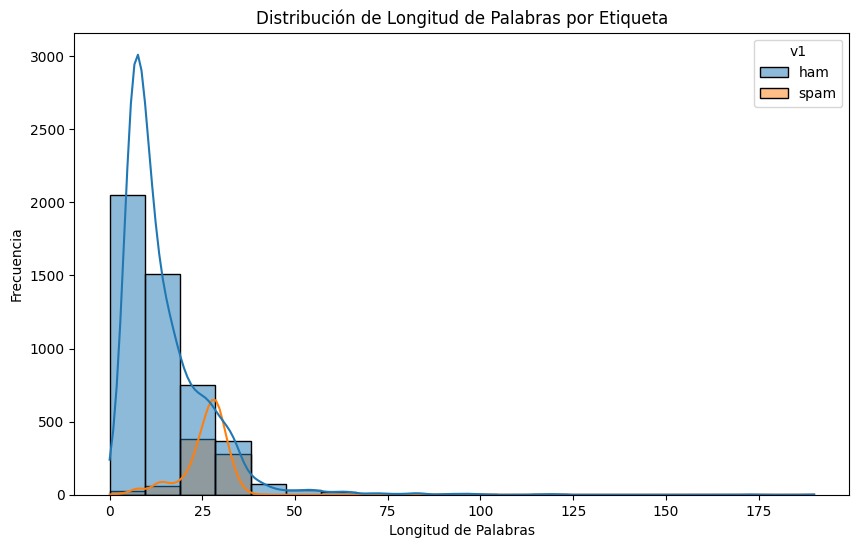

In [18]:
# 8. Análisis de la longitud de palabras
df['word_length'] = df['v2'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))
plt.figure(figsize=(10, 6))
sns.histplot(df, x='word_length', hue='v1', bins=20, kde=True)
plt.title('Distribución de Longitud de Palabras por Etiqueta')
plt.xlabel('Longitud de Palabras')
plt.ylabel('Frecuencia')
plt.show()

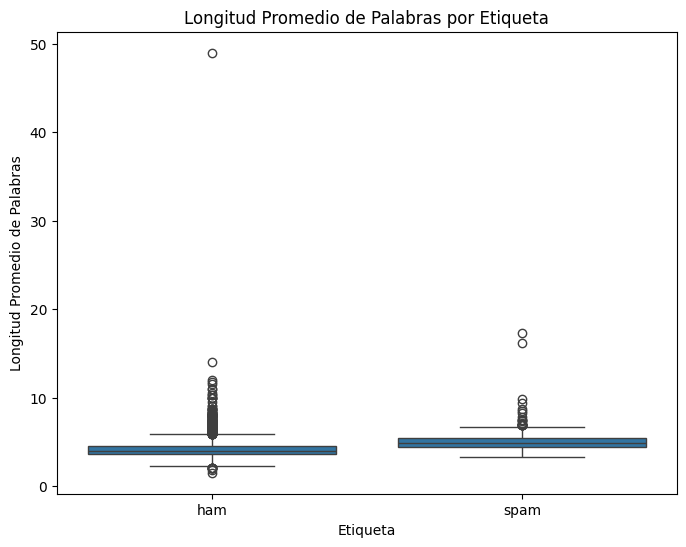

In [19]:
# 8. Análisis de la longitud del mensaje por etiqueta
plt.figure(figsize=(8, 6))
sns.boxplot(x='v1', y='avg_word_length', data=df)
plt.title('Longitud Promedio de Palabras por Etiqueta')
plt.xlabel('Etiqueta')
plt.ylabel('Longitud Promedio de Palabras')
plt.show()

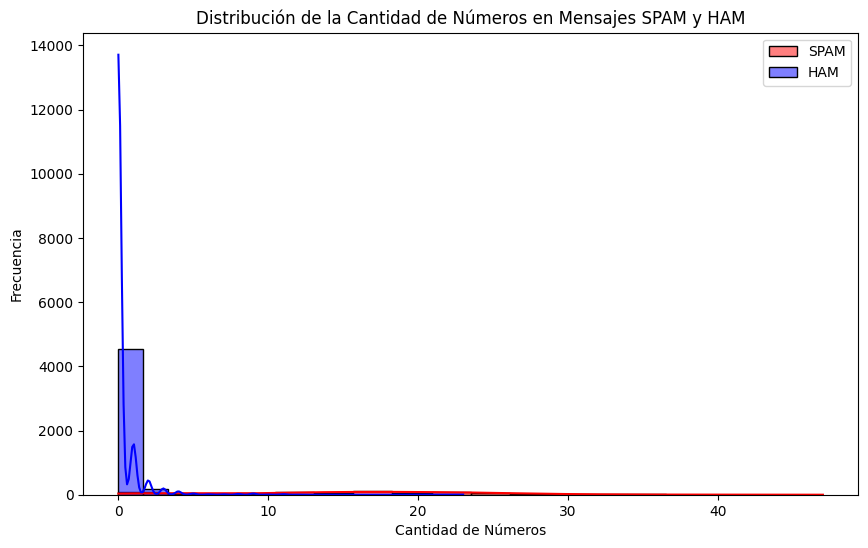

In [20]:
# 1. Análisis de la cantidad de números en los mensajes
def count_numbers(text):
    return len(re.findall(r'\d', text))

df['number_count'] = df['v2'].apply(count_numbers)

# 2. Visualizar la distribución de la cantidad de números en mensajes SPAM y HAM
plt.figure(figsize=(10, 6))
sns.histplot(df[df['v1'] == 'spam']['number_count'], color='red', label='SPAM', kde=True)
sns.histplot(df[df['v1'] == 'ham']['number_count'], color='blue', label='HAM', kde=True)
plt.title('Distribución de la Cantidad de Números en Mensajes SPAM y HAM')
plt.xlabel('Cantidad de Números')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()



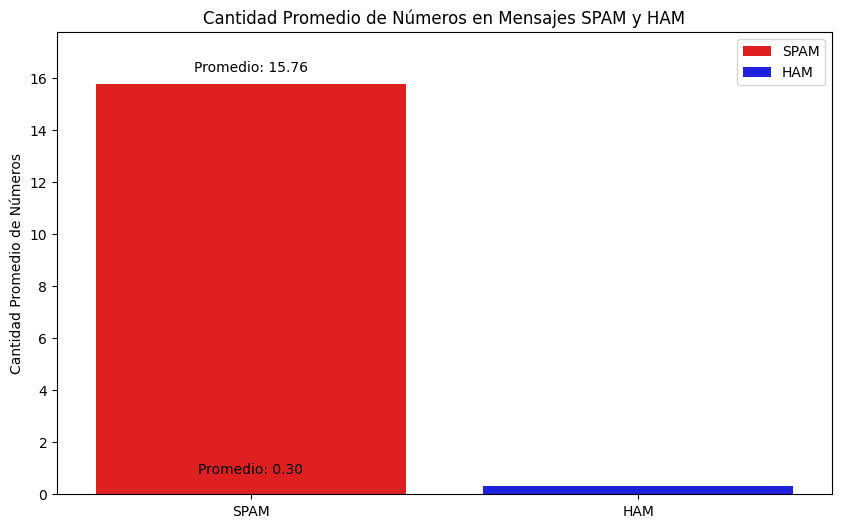

In [21]:
# 1. Análisis de la cantidad de números en los mensajes
def count_numbers(text):
    return len(re.findall(r'\d', text))

# Contar números en mensajes SPAM
spam_number_counts = df[df['v1'] == 'spam']['v2'].apply(count_numbers)

# Contar números en mensajes HAM
ham_number_counts = df[df['v1'] == 'ham']['v2'].apply(count_numbers)

# 2. Visualizar la cantidad de números en mensajes SPAM y HAM mediante gráficos de barras
plt.figure(figsize=(10, 6))

# Gráfico de barras para la cantidad de números en mensajes SPAM
sns.barplot(x=['SPAM'], y=[spam_number_counts.mean()], color='red', label='SPAM')
plt.text(x=0, y=spam_number_counts.mean() + 0.5, s=f"Promedio: {spam_number_counts.mean():.2f}", ha='center')

# Gráfico de barras para la cantidad de números en mensajes HAM
sns.barplot(x=['HAM'], y=[ham_number_counts.mean()], color='blue', label='HAM')
plt.text(x=0, y=ham_number_counts.mean() + 0.5, s=f"Promedio: {ham_number_counts.mean():.2f}", ha='center')

plt.title('Cantidad Promedio de Números en Mensajes SPAM y HAM')
plt.ylabel('Cantidad Promedio de Números')
plt.ylim(0, max(spam_number_counts.mean(), ham_number_counts.mean()) + 2)
plt.legend()
plt.show()